# Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: `Fresh`, `Milk`, `Grocery`, `Frozen`, `Detergents_Paper`, and `Delicatessen`. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

We will look at the sample data, specifically the number of standard deviations away from the mean.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [10,100,310]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)
mu = data.mean().round()
sigma = data.std().round()
display(samples/sigma - mu/sigma)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3366,5403,12974,4400,5977,1744
1,11594,7779,12144,3252,8035,3029
2,7034,1492,2405,12569,299,1117


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-0.682692,-0.053252,0.528570,0.273532,0.649329,0.077660
1,-0.032102,0.268699,0.441229,0.037075,1.080956,0.533333
2,-0.392662,-0.583198,-0.583605,1.956128,-0.541527,-0.144681


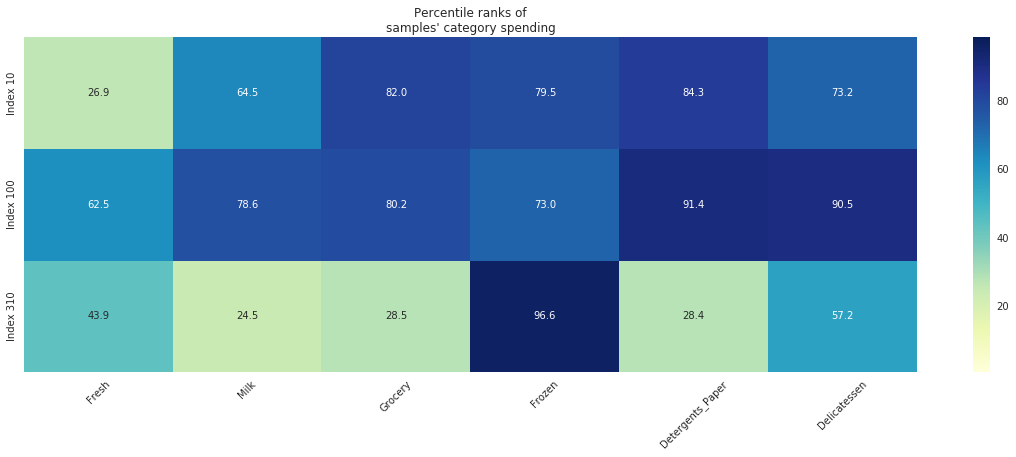

In [4]:
# look at percentile ranks
pcts = 100.*data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)

# visualize percentiles with heatmap
plt.figure(figsize=(20,6))
sns.heatmap(pcts, yticklabels=['Index '+str(x) for x in indices], annot=True, vmin=1, vmax=99, fmt='.1f', cmap='YlGnBu')
plt.title('Percentile ranks of\nsamples\' category spending')
ticks = plt.xticks(rotation=45, ha='center')

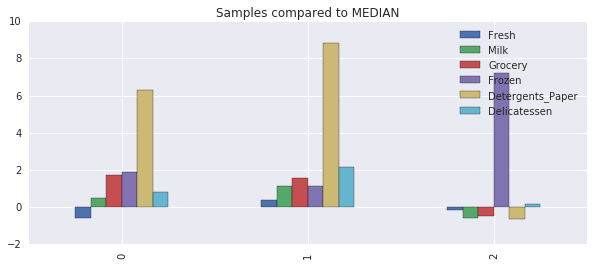

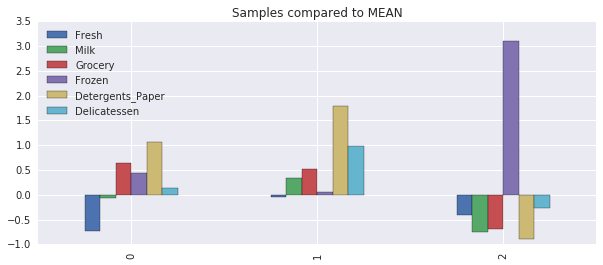

In [5]:
((samples-data.median()) / data.median()).plot.bar(figsize=(10,4), title='Samples compared to MEDIAN')
((samples-data.mean()) / data.mean()).plot.bar(figsize=(10,4), title='Samples compared to MEAN')

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
In looking at our samples, it is useful to compare them to the mean and median of the overall datasets. 

The first is half a standard deviation below the mean in the `Fresh` category, nearly in the bottom quartile, and half a standard deviation above the mean in the `Grocery` and `Detergents_Paper` categories, in the top quartile in both. This is perhaps a corner market, specializing in grocery and sundries but missing the produce. 

The second is half a standard deviation above the mean in `Delicatessen` and `Grocery`, and over a whole standard deviation above the mean in the `Detergents_Paper` category. The `Delicatessen` category is something of a wild card. This sample is in the top decile in `Detergents_Paper` and `Delicatessen`. I would posit that perhaps this is a deli or restaurant of some kind. 

The third is well below average in most categories, except `Frozen` that is nearly two standard deviations above the norm. It is in the top 5% of samples for `Frozen`. Definitely an ice cream parlor. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

def calculate_r_2_for_feature(data,feature):
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(feature, axis=1)

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, \
    X_test,  \
    y_train, \
    y_test = train_test_split(
        new_data,data[feature],test_size=0.25
    )

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train,y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test,y_test)
    return score

def r_2_mean(data,feature,runs=200):
    return np.array([ calculate_r_2_for_feature(data,feature) for i in range(200) ]).mean().round(4)

print "{0:17} {1}".format("Fresh: ", r_2_mean(data,'Fresh'))
print "{0:17} {1}".format("Milk: ", r_2_mean(data,'Milk'))
print "{0:17} {1}".format("Grocery: ", r_2_mean(data,'Grocery'))
print "{0:17} {1}".format("Frozen: ", r_2_mean(data,'Frozen'))
print "{0:17} {1}".format("Detergents_Paper: ", r_2_mean(data,'Detergents_Paper'))
print "{0:17} {1}".format("Delicatessen: ", r_2_mean(data,'Delicatessen'))

Fresh:            -0.6972
Milk:             0.112
Grocery:          0.6822
Frozen:           -1.103
Detergents_Paper:  0.6755
Delicatessen:     -3.3363


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

`Fresh`, `Frozen`, and `Delicatessen` all have negative $R^2$ scores. This signifies that these *must* be included in our analysis. `Milk`, `Grocery` and `Detergents_Paper` have positive $R^2$ scores. 

`Grocery` and `Detergents_Paper` have very high $R^2$ scores which means that the other data does fairly well in predicting these features. It is possible that we might exclude one or the other feature. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

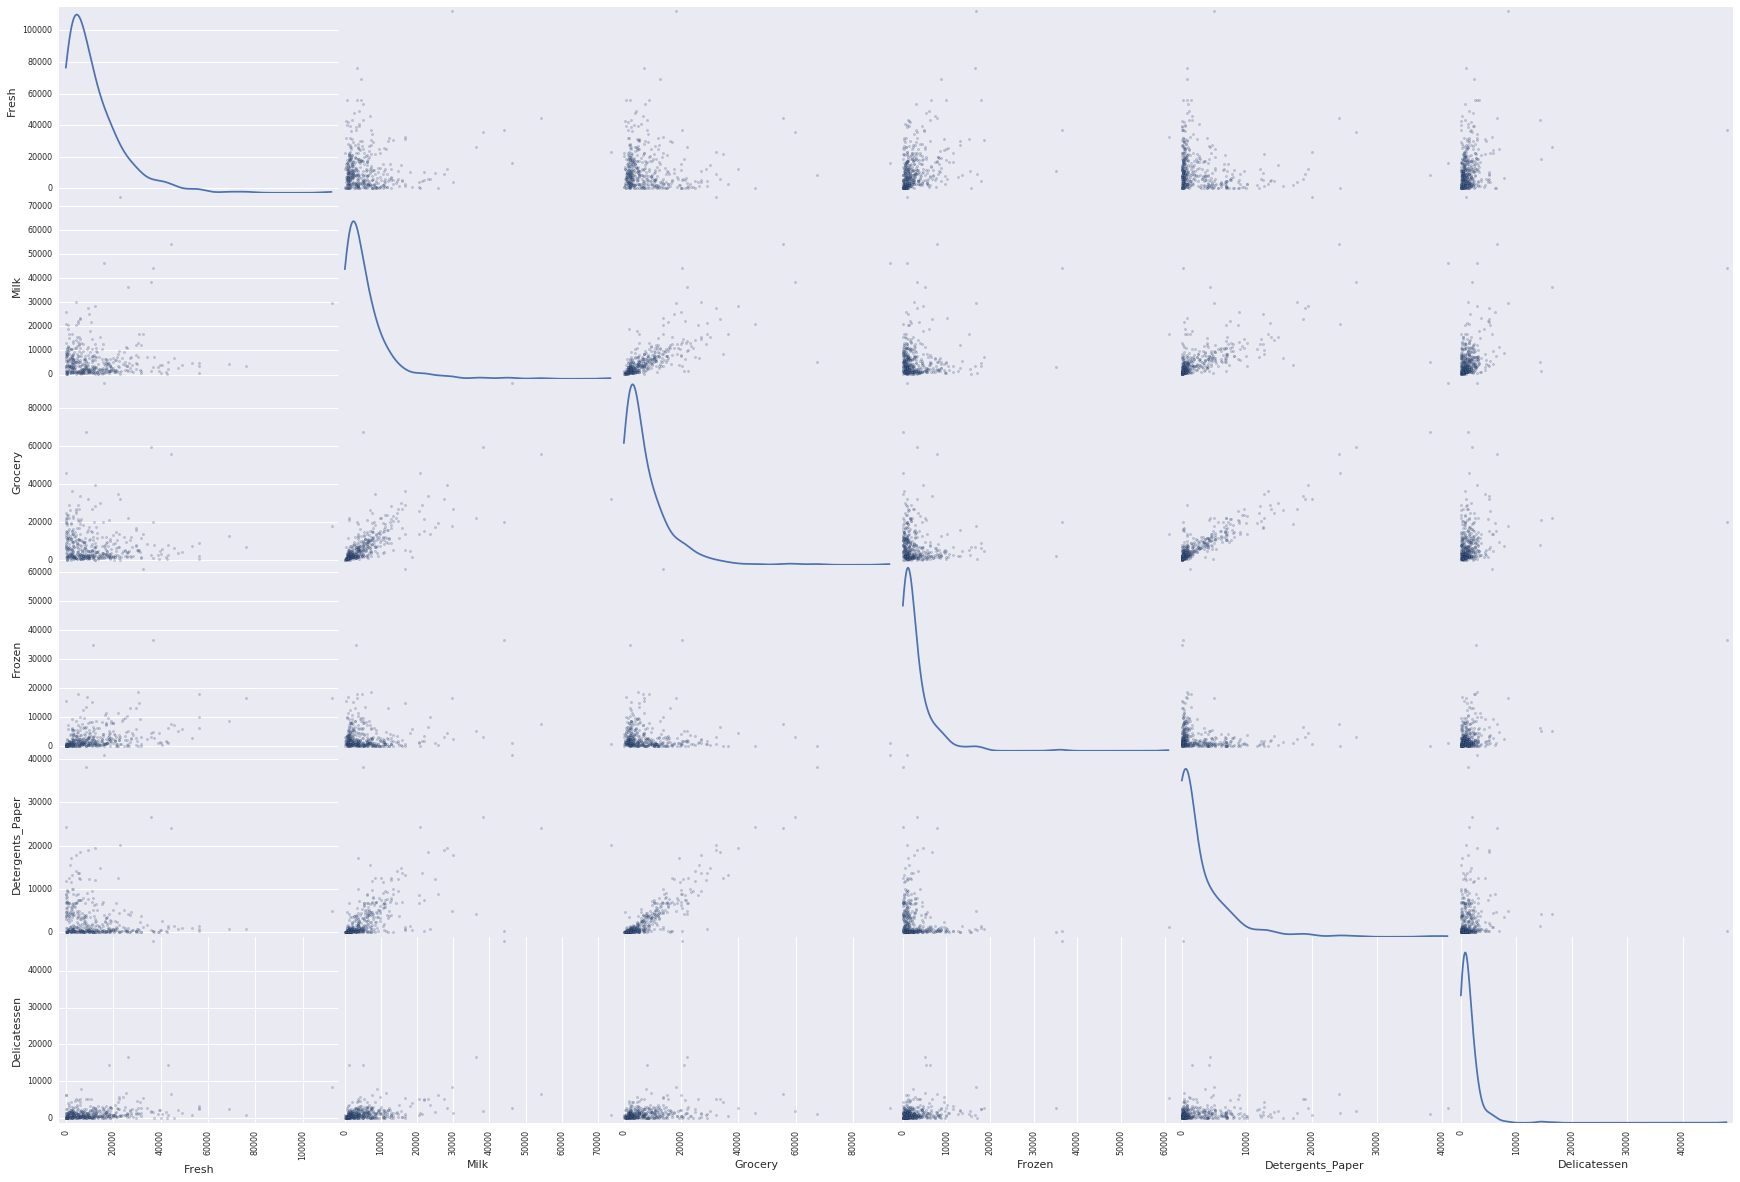

In [5]:
# Produce a scatter matrix for each pair of features in the data
scatter_matrix = pd.scatter_matrix(
    data, alpha = 0.3, figsize = (30,20), diagonal = 'kde'
)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

Fresh:            -0.6189
Milk:             0.2613
Grocery:          0.4051
Frozen:           -0.687
Detergents_Paper:  0.3625
Delicatessen:     -0.7377


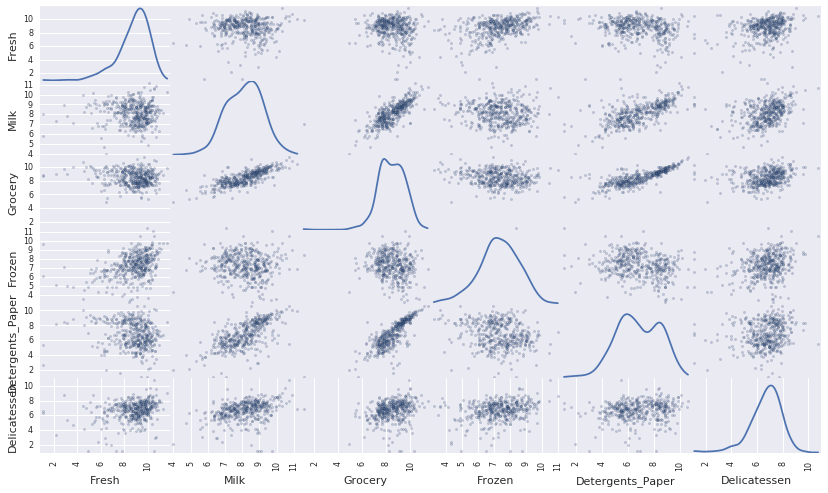

In [6]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

print "{0:17} {1}".format("Fresh: ", r_2_mean(log_data,'Fresh'))
print "{0:17} {1}".format("Milk: ", r_2_mean(log_data,'Milk'))
print "{0:17} {1}".format("Grocery: ", r_2_mean(log_data,'Grocery'))
print "{0:17} {1}".format("Frozen: ", r_2_mean(log_data,'Frozen'))
print "{0:17} {1}".format("Detergents_Paper: ", r_2_mean(log_data,'Detergents_Paper'))
print "{0:17} {1}".format("Delicatessen: ", r_2_mean(log_data,'Delicatessen'))

# Produce a scatter matrix for each pair o.f newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

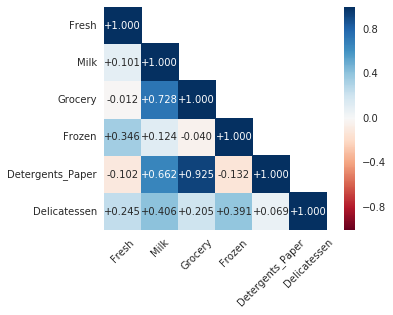

In [7]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

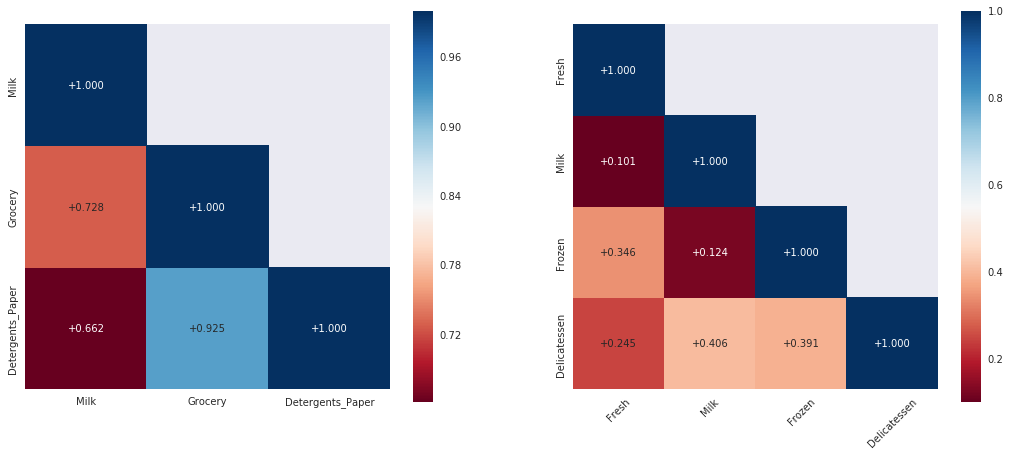

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

corr_milk_groc_det = data[['Milk','Grocery','Detergents_Paper']].corr()
mask_milk_groc_det = np.zeros_like(corr_milk_groc_det)
mask_milk_groc_det[np.triu_indices_from(mask_milk_groc_det, 1)] = True

corr_fresh_frozen_deli = data[['Fresh','Milk','Frozen','Delicatessen']].corr()
mask_fresh_frozen_deli = np.zeros_like(corr_fresh_frozen_deli)
mask_fresh_frozen_deli[np.triu_indices_from(mask_fresh_frozen_deli, 1)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(corr_milk_groc_det, mask=mask_milk_groc_det, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f', ax=ax1)
    plt.xticks(rotation=45, ha='center')
with sns.axes_style("white"):
    ax = sns.heatmap(corr_fresh_frozen_deli, mask=mask_fresh_frozen_deli, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f', ax=ax2)
    plt.xticks(rotation=45, ha='center')

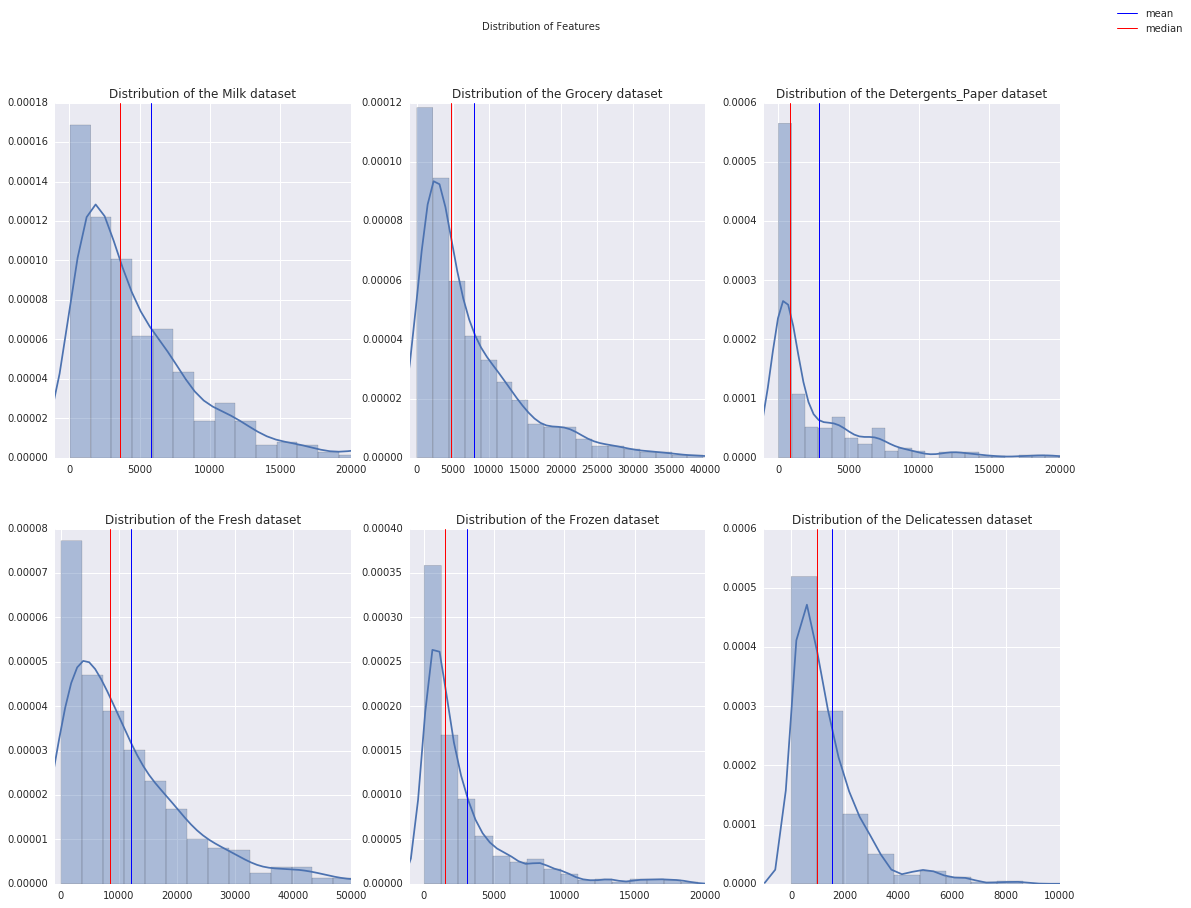

In [9]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
fig.set_size_inches(18, 14)
fig.suptitle('Distribution of Features')
sns.distplot(data[['Milk']], ax=ax1).set(xlim=(-1000, 20000))
ax1.set_title("Distribution of the Milk dataset")
ax1.axvline(data['Milk'].mean(),linewidth=1)
ax1.axvline(data['Milk'].median(),linewidth=1, color='r')
sns.distplot(data[['Grocery']], ax=ax2).set(xlim=(-1000, 40000))
ax2.set_title("Distribution of the Grocery dataset")
ax2.axvline(data['Grocery'].mean(),linewidth=1)
ax2.axvline(data['Grocery'].median(),linewidth=1, color='r')
sns.distplot(data[['Detergents_Paper']], ax=ax3).set(xlim=(-1000, 20000))
ax3.set_title("Distribution of the Detergents_Paper dataset")
ax3.axvline(data['Detergents_Paper'].mean(),linewidth=1)
ax3.axvline(data['Detergents_Paper'].median(),linewidth=1, color='r')
sns.distplot(data[['Fresh']], ax=ax4).set(xlim=(-1000, 50000))
ax4.set_title("Distribution of the Fresh dataset")
ax4.axvline(data['Fresh'].mean(),linewidth=1)
ax4.axvline(data['Fresh'].median(),linewidth=1, color='r')
sns.distplot(data[['Frozen']], ax=ax5).set(xlim=(-1000, 20000))
ax5.set_title("Distribution of the Frozen dataset")
ax5.axvline(data['Frozen'].mean(),linewidth=1)
ax5.axvline(data['Frozen'].median(),linewidth=1, color='r')
sns.distplot(data[['Delicatessen']], ax=ax6).set(xlim=(-1000, 10000))
ax6.set_title("Distribution of the Delicatessen dataset")
mean_line = ax6.axvline(data['Delicatessen'].mean(),linewidth=1)
median_line = ax6.axvline(data['Delicatessen'].median(),linewidth=1, color='r')
fig.legend((mean_line, median_line),('mean', 'median'))

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
`Grocery`, `Detergents_Paper`, and `Milk` are clearly postively correlated. Look at these correlation coefficients:

- `Milk` - `Grocery`: 0.728
- `Milk` - `Detergents_Paper`: 0.662
- `Grocery` - `Detergents_Paper`: 0.925

`Delicatessen` has some positive correlation to `Milk` (0.406) and `Frozen` (0.391). 

`Frozen` and `Fresh` have some positive correlation (0.346).

`Fresh` and `Frozen` both have very small negative correlations with `Detergents_Paper`.

All six features have a mean that is higher than their median which signifies a right skew. 

### Post-Log Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

`Fresh` appears to have a left skew to its distribution as well as a sligh positive correlation with `Frozen`.

`Milk` has a strange inflection point, a possible left skew. It has a high positive correlation with `Grocery`, a positive correlation with `Detergents_Paper`, and a low postive correlation with `Delicatessen`.

`Grocery` has the same type of inflection, with a possible right skew. It has a high positive correlation with `Milk` and `Detergents_Paper` and a low positive correlation with `Delicatessen`. 

`Frozen` has a slight right skew and is largely uncorrelated. 

`Detergents_Paper` has two peaks in the data distribution and appears to have a high positive correlation with `Milk` and `Grocery`. 

`Delicatessen` is mostly symmetric. It appears to have a low positive correlation with `Milk`.

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937
1,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988
2,8.858511,7.307873,7.785305,9.438989,5.700444,7.018402


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
# For each feature find the data points with extreme high or low values
raw_outliers = []

for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    raw_outliers.append(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist())


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [16]:
# OPTIONAL: Select the indices for data points you wish to remove
outlier_set = []
outliers  = []
for r in raw_outliers:
    outlier_set += r
    
counts = []    
for i in outlier_set:
    r_count = 0
    for r in raw_outliers:
        r_count += r.count(i)
    if r_count > 1:
        counts.append((i,r_count))
        outliers.append(i)

outliers = np.unique(outliers)        
print counts
print outliers


[(65, 2), (66, 2), (128, 2), (154, 3), (75, 2), (154, 3), (65, 2), (75, 2), (66, 2), (128, 2), (154, 3)]
[ 65  66  75 128 154]


In [17]:
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
I wrote a short Python method to handle the above, removing data points considered outliers for more than one feature. Worth considering is for *which* feature the point is considered an outlier. It is important to remove outliers from the analysis because a k-means analysis can be sensitive to outliers. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

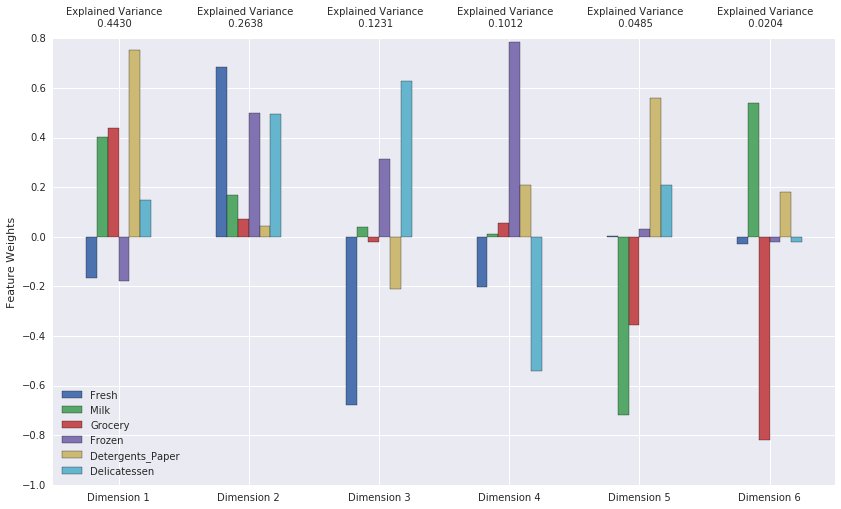

In [18]:
# TODO: Apply PCA to the good data with the same number of dimensions as features
from sklearn.decomposition import PCA 
pca = PCA(6)
pca.fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

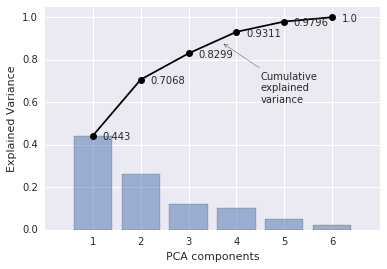

In [19]:
# create an x-axis variable for each pca component
x = np.arange(1,7)

# plot the cumulative variance
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o', color='black')

# plot the components' variance
plt.bar(x, pca.explained_variance_ratio_, align='center', alpha=0.5)

# plot styling
plt.ylim(0, 1.05)
plt.annotate('Cumulative\nexplained\nvariance',
             xy=(3.7, .88), arrowprops=dict(arrowstyle='->'), xytext=(4.5, .6))
for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)),xy=(i+.2,j-.02))
plt.xticks(range(1,7))
plt.xlabel('PCA components')
plt.ylabel('Explained Variance')
plt.show()

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**  70.68% of the variance is explained by the first two principal components. 93.11% of the variance is explained by the first four principal components. 

The first dimension looks to capture the correlation between `Milk`, `Grocery`, `Detergents_Paper`, and `Delicatessen`. It places a heavy emphasis on these four features and subtracts from the linear combination the remaining two features. `Delicatessen` which is the least correlated has the smallest weight. This signifies that customers with a high value for this component are making large purchases in `Milk`, `Grocery`, `Detergents_Paper`, and `Delicatessen` as compared to other customers. 

The second dimension capture the remaining two, `Fresh` and `Frozen`, and also adds in additional `Delicatessen`. Note that the remaining three are not negative, just minimally represented. This signifies that customers with a high value for this component are making large purchases in `Fresh` and `Frozen`.

The third dimension looks to separate (by subtraction) `Fresh` from any correlation to `Frozen` and `Delicatessen`. It also removes a healty chunk of `Detergents_Paper`. This signifies that customers with a high value for this component are making large purchases in `Frozen` and `Delicatessen`.

The fourth dimension emphasizes `Frozen`, subtracting both `Delicatessen` and `Fresh` with which it had been previously correlated. And adds a little `Detergents_Paper` back into the mix. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [20]:
# Display sample log-data after having a PCA transformation applied
display(samples)
mu = data.mean().round()
sigma = data.std().round()
display(samples/sigma - mu/sigma)
display(log_samples)
log_mu = log_data.mean().round()
log_sigma = log_data.std().round()
display(log_samples/log_sigma - log_mu/log_sigma)
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3366,5403,12974,4400,5977,1744
1,11594,7779,12144,3252,8035,3029
2,7034,1492,2405,12569,299,1117


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-0.682692,-0.053252,0.528570,0.273532,0.649329,0.077660
1,-0.032102,0.268699,0.441229,0.037075,1.080956,0.533333
2,-0.392662,-0.583198,-0.583605,1.956128,-0.541527,-0.144681


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937
1,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988
2,8.858511,7.307873,7.785305,9.438989,5.700444,7.018402


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-0.878520,0.594710,1.470703,1.389360,0.847837,0.463937
1,0.358243,0.959183,1.404590,1.087025,0.995781,1.015988
2,-0.141489,-0.692127,-0.214695,2.438989,-0.649778,0.018402


,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.0887,0.7006,0.8537,1.0105,0.5587,-0.2495
1,2.3579,1.7393,0.2210,0.2840,0.5939,0.0148
2,-1.7942,1.0499,1.0204,1.1879,0.3548,-0.1423


Sample 0 has quite a bit of everything but 'Fresh'. This would match up with a high representation of the first four dimension as we note. It also has quite a bit of the 'Milk', 'Grocery', 'Detergents_Paper' trio and we can see this in the first dimension.

Sample 1 has quite a bit of the 'Milk', 'Grocery', 'Detergents_Paper' trio. This can be seen in Dimension 1. Dimension 3 and 4 reduce 'Fresh' and 'Delicatessen'. But Sample 1 has both of these. This can be seen in the small amount of Dimension 3 and 4, and the large amount of Dimension 2. 

Sample 2 is strong with 'Frozen' and weak with most others. As such we would expect it to have a low amount of Dimension 1 and high amounts of Dimension 2, 3, and 4, which it does. 

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [21]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(2)
pca.fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [22]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.0887,0.7006
1,2.3579,1.7393
2,-1.7942,1.0499


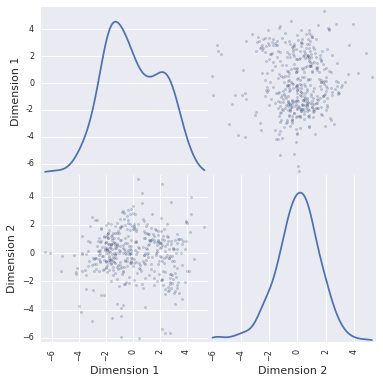

In [23]:
# Produce a scatter matrix for pca reduced data
reduced_scatter_matrix = pd.scatter_matrix(reduced_data, alpha = 0.3, figsize = (6,6), diagonal = 'kde')

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
K-Means has a simple loss function which we minimize to find our clusters, just the Euclidean distance. It is designed to work on clusters with a spherical distribution. It performs hard assignment of samples to clusters. GMM uses a much more complicated (computationally expensive) loss function (the negative log likelihood) and performs soft assignment of samples to clusters. It can be used on more general data sets. 

Given the data we have, in particular the distribution of the two principal components, it appears that we have a spherical distribution with two clusters. As such, I recommend that we use K-Means. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

('For n_clusters =', 2, 'The average silhouette_score is :', 0.42628101546910835)


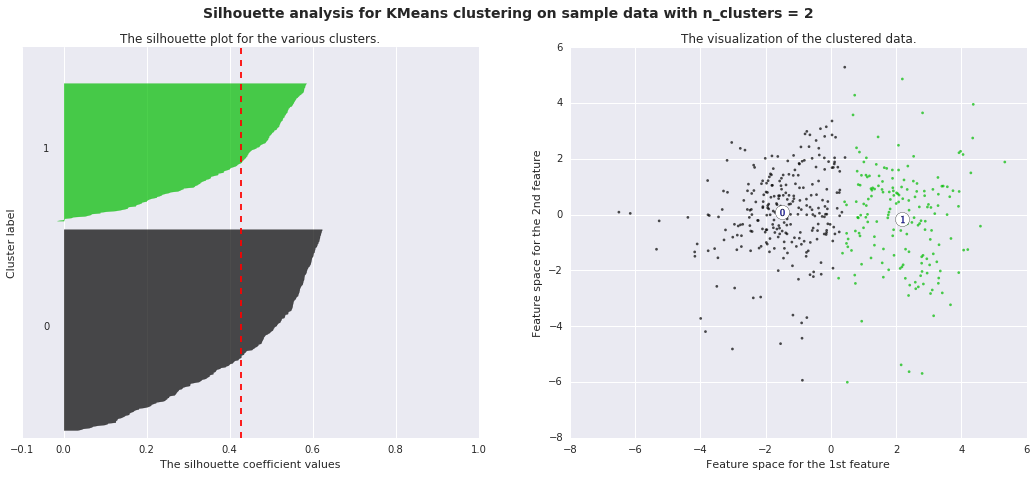

('For n_clusters =', 3, 'The average silhouette_score is :', 0.39689092644980506)


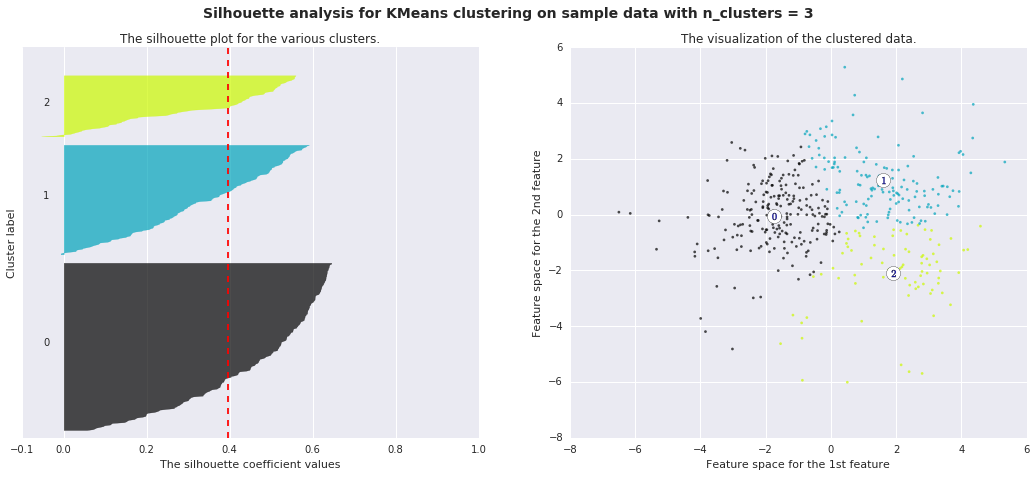

('For n_clusters =', 4, 'The average silhouette_score is :', 0.33184127600936941)


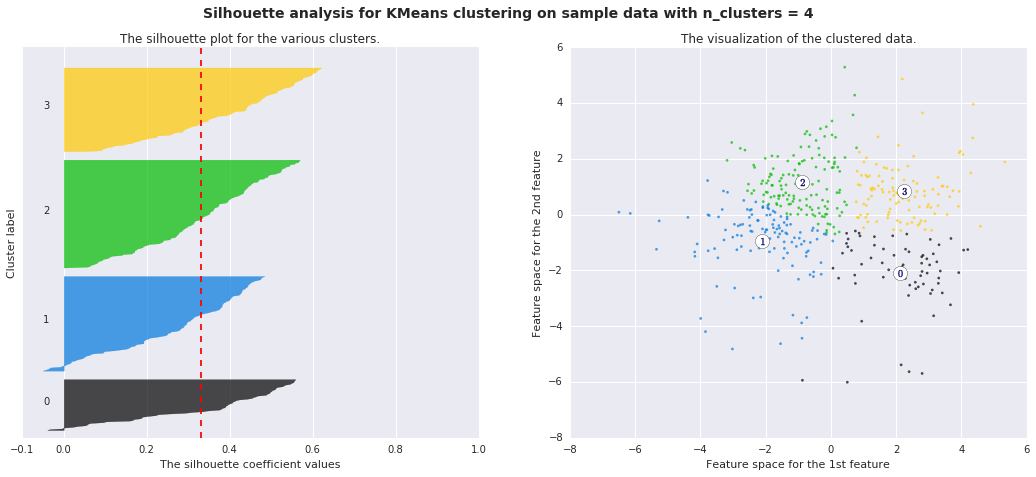

('For n_clusters =', 5, 'The average silhouette_score is :', 0.34999779752629756)


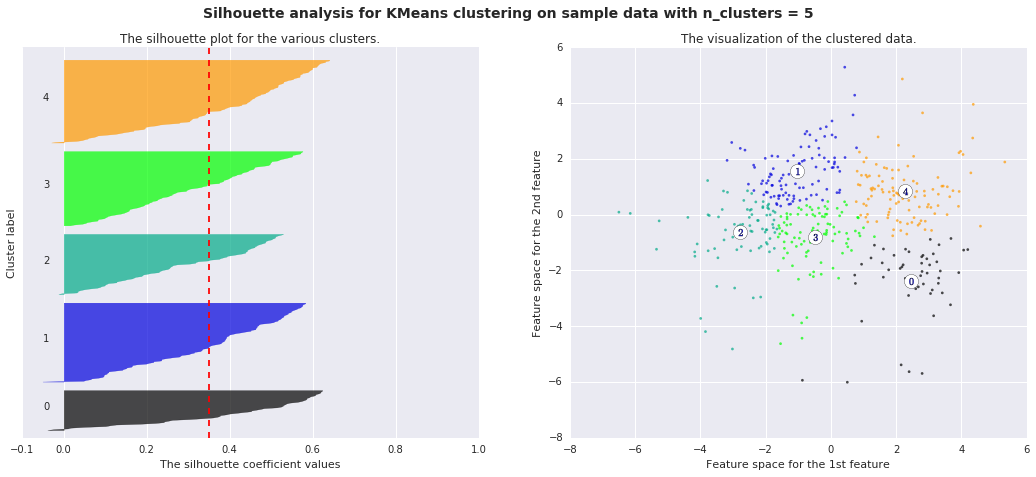

('For n_clusters =', 6, 'The average silhouette_score is :', 0.36588522063299811)


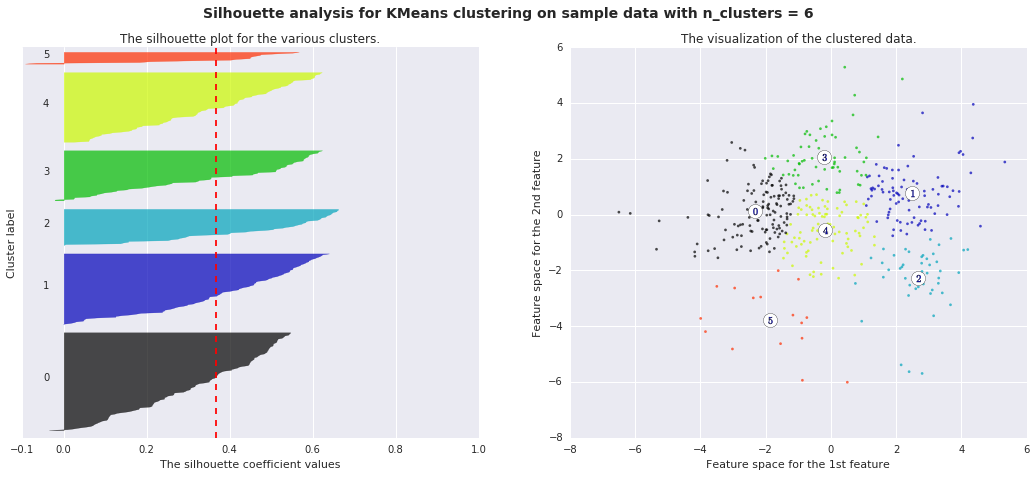

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]
sil_scrs = []
n_centers = []
n_preds = []

def plots_for_n_clusters(range_n_clusters):
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # TODO: Apply your clustering algorithm of choice to the reduced data 
        clusterer = KMeans(n_clusters=n_clusters, random_state=42)
        clusterer.fit(reduced_data)

        # TODO: Predict the cluster for each data point
        preds = clusterer.labels_
        silhouette_avg = silhouette_score(reduced_data, preds)
        sil_scrs.append((n_clusters, silhouette_avg))
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(reduced_data, preds)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[preds == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

            ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhoutte score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.spectral(preds.astype(float) / n_clusters)
        # reduced_scatter_matrix = pd.scatter_matrix(reduced_data, alpha = 0.3, figsize = (6,6), diagonal = 'kde',c)
        ax2.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors)

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1],
                    marker='o', c="white", alpha=1, s=200)

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()
        
plots_for_n_clusters(range_n_clusters)

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
Running this procedures for several numbers of clusters verifies what we see in the scatter matrix ... we most likely have two clusters. We can tell this because we have the following silhouette scores: 


In [25]:
sil_scrs

[(2, 0.42628101546910835),
 (3, 0.39689092644980506),
 (4, 0.33184127600936941),
 (5, 0.34999779752629756),
 (6, 0.36588522063299811)]

Note that our highest score is for $n=2$. 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

('For n_clusters =', 2, 'The average silhouette_score is :', 0.42628101546910835)


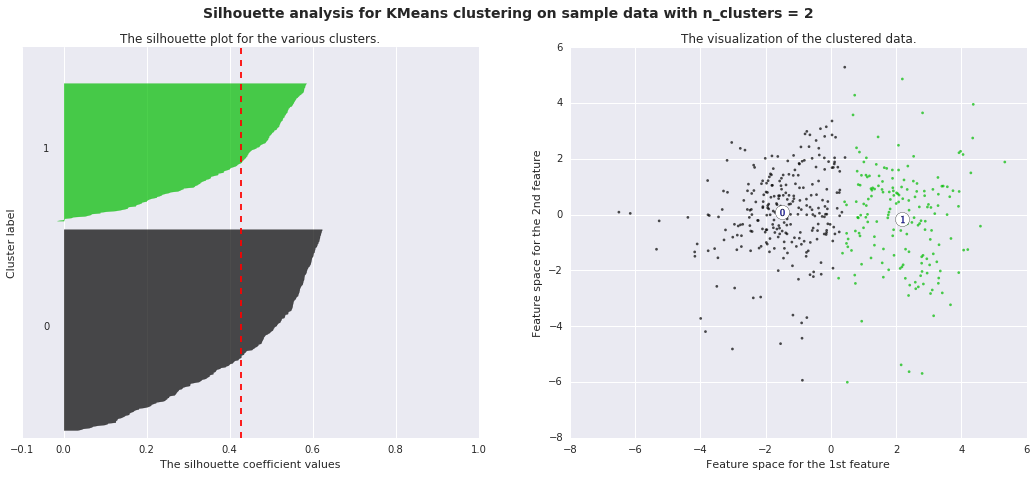

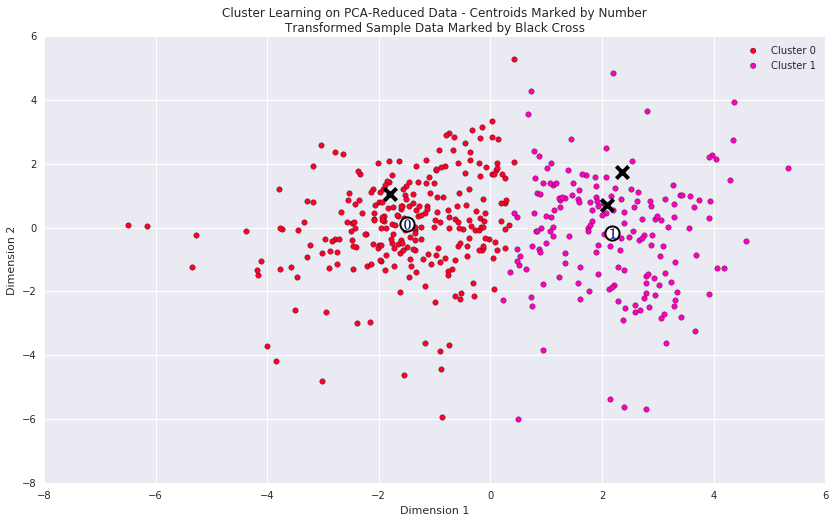

In [26]:
plots_for_n_clusters([2])

clusterer = KMeans(n_clusters=2, random_state=42)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.labels_
centers = clusterer.cluster_centers_
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)



### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [27]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)


# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


#### Standard Deviations

In [28]:
mu = data.mean().round()
sigma = data.std().round()
display(true_centers/sigma - mu/sigma)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-0.247727,-0.528320,-0.576029,-0.202678,-0.542576,-0.299291
Segment 1,-0.632166,0.285095,0.437020,-0.436663,0.352349,-0.173404


           Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0   52.3  30.5     30.5    58.7              28.3          37.6
Segment 1   28.7  79.0     79.9    35.1              79.2          52.9


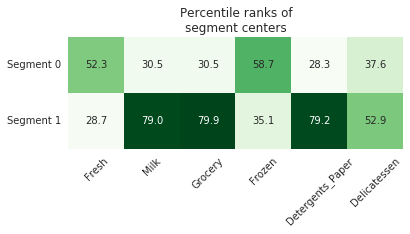

In [29]:
# add the true centers as rows to our original data
newdata = data.append(true_centers)

# show the percentiles of the centers
ctr_pcts = 100. * newdata.rank(axis=0, pct=True).loc[['Segment 0', 'Segment 1']].round(decimals=3)
print ctr_pcts

# visualize percentiles with heatmap
_ = sns.heatmap(ctr_pcts, annot=True, cmap='Greens', fmt='.1f', square=True, cbar=False)
plt.xticks(rotation=45, ha='center')
plt.yticks(rotation=0)
plt.title('Percentile ranks of\nsegment centers');

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
Segment 1 is fairly easy to identify. It is the group we have seen throughout that is buying heavily from the `Milk`, `Grocery`, and `Detergents_Paper` categories. This would correspond to markets or groceries.  

Segment 0 is a little bit more difficult.  `Fresh` and `Frozen` have some positive correlation with each other and this vector appears to capture that relationship. This would correspond to restaurants or establishments preparing food. 

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [30]:
# Display the predictions
sample_preds = clusterer.predict(pca_samples)
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

Samples 0 and 1 both have high spending in the principal group we have identified (`Milk`, `Grocery`, `Detergents_Paper`) so it makes sense that they would land in this Cluster 1. Sample 2 has very high spending in `Frozen` so it would make sense that it lands in the other Cluster 0. 

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**
Delivery frequency is not a parameter explicitly captured by our data. That said it can be seen in other parameters, especially it would seem, `Fresh` and `Milk`. Considering that these two parameters are largely represented by two different components in our principal component analysis, we must make sure to represent both of these in an A/B test. 

In [33]:
print "Total customers: ", len(data)
print "Cluster 1: ", sum(preds)
print "Cluster 0: ", len(data) - sum(preds)

Total customers:  440
Cluster 1:  177
Cluster 0:  263


To assess the effect of this change, I recommend the following:

Select 36 members of Cluster 1 and 52 members of Cluster 0. Make the desired change for these customers i.e. make deliveries to this sub-group every 3 days rather than every 5 days. This will be the B1 and B0 groups, respectively.

Continue to make deliveries every 5 days to the remaining 141 members of Cluster 1 and 211 members of Cluster 0. This will be the A1 and A0 groups, respectively. 

Do this for 30 days. After the days examine the purchasing habits of all customers **over 30 days**. Assess if there are significant differences in the B0 as compared to A0 and B1 as compared to A1. 


### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**
Our principal component clustering analysis has basically yielded a binary classification for each entity in our analysis. Each customer falls either into cluster 0 or cluster 1. We can use then add a target feature `Cluster` to our data set and use this to train a supervised classifier over our data. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

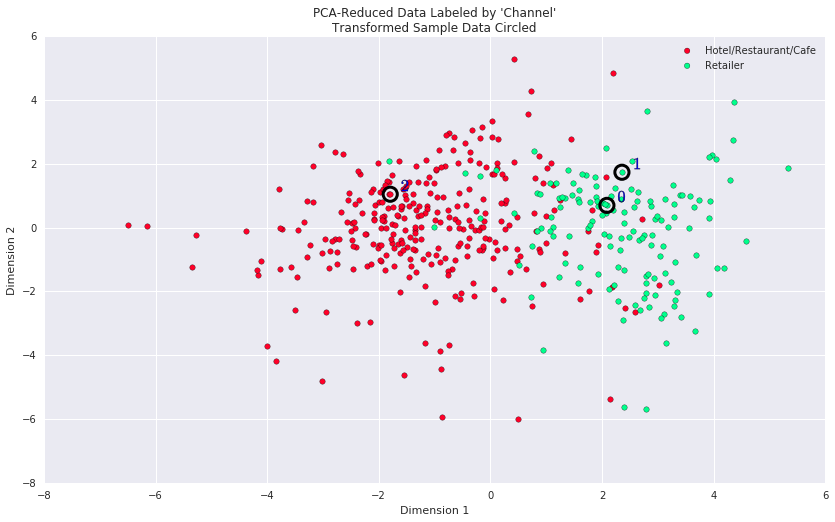

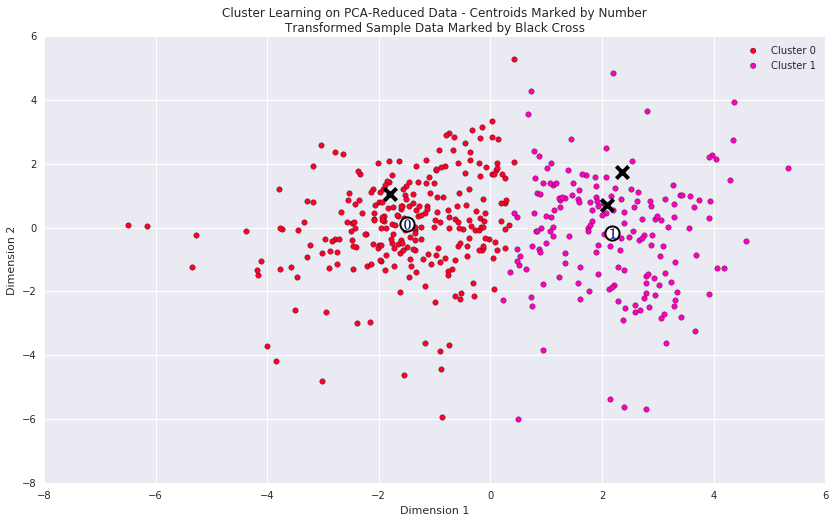

In [29]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
It is clear that our cluster analysis has identified the underlying structure to the data that is built into the feature `Channel`. We ran a cluster analysis against numerous different numbers of clusters and found that 2 was the best. This would fit with this `Channel` feature. Furthermore, the distribution of the two clusters seems to largely line up. There are some points that lie in the "wrong" cluster, but we can account for this by the fact that some customers may overlap in their purpose.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.